## Importing Necessary Libraries
---



---



In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import learning_curve
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from tabulate import tabulate

## Load preprocessed data
---



---


In [2]:
X_train = pd.read_pickle("/Users/pranavkhot/Documents/Fetal Health Project/data/X_train.pkl")
X_test = pd.read_pickle("/Users/pranavkhot/Documents/Fetal Health Project/data/X_test.pkl")
y_train = pd.read_pickle("/Users/pranavkhot/Documents/Fetal Health Project/data/y_train.pkl")
y_test = pd.read_pickle("/Users/pranavkhot/Documents/Fetal Health Project/data/y_test.pkl")
X = pd.read_pickle("/Users/pranavkhot/Documents/Fetal Health Project/data/X.pkl")
y = pd.read_pickle("/Users/pranavkhot/Documents/Fetal Health Project/data/y.pkl")    

## Create a LightGBM classifier
---



---


In [3]:
lgbm = LGBMClassifier(random_state=42)

## Train the classifier
---



---


In [4]:
lgbm.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000605 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 600
[LightGBM] [Info] Number of data points in the train set: 1700, number of used features: 10
[LightGBM] [Info] Start training from score -0.250726
[LightGBM] [Info] Start training from score -1.974552
[LightGBM] [Info] Start training from score -2.489624
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier(random_state=42)

## Predict the target variable for the test data
---



---


In [5]:
y_pred_train_lgbm = lgbm.predict(X_train)
y_pred_test_lgbm = lgbm.predict(X_test)

## Evaluation metrics calculations
---



---


In [6]:
# Calculate accuracy, f1-score
lgbm_accuracy_test = accuracy_score(y_test, y_pred_test_lgbm) * 100
lgbm_accuracy_train = accuracy_score(y_train, y_pred_train_lgbm) * 100
lgbm_f1 = f1_score(y_test, y_pred_test_lgbm, average='weighted') * 100
lgbm_accuracy_overall = (lgbm_accuracy_test + lgbm_accuracy_train) / 2

# Create a dictionary to store different metrics
metrics_dict_lgbm = {
    "Model": ["LightGBM"],
    "Train Accuracy": [f"{lgbm_accuracy_train:.3f}%"],
    "Test Accuracy": [f"{lgbm_accuracy_test:.3f}%"],
    "Overall Accuracy": [f"{lgbm_accuracy_overall:.3f}%"],
    "F1-Score": [f"{lgbm_f1:.3f}%"]
}

# Convert the dictionary to a DataFrame
metrics_df_lgbm = pd.DataFrame(metrics_dict_lgbm)
print("\nLGB Metrics:")
print(tabulate(metrics_df_lgbm, headers='keys', tablefmt='fancy_grid', showindex=False))

# Save the DataFrame to a CSV file
metrics_df_lgbm.to_csv("/Users/pranavkhot/Documents/Fetal Health Project/results/LGB/lgb_metrics.csv", index=False)


LGB Metrics:
╒══════════╤══════════════════╤═════════════════╤════════════════════╤════════════╕
│ Model    │ Train Accuracy   │ Test Accuracy   │ Overall Accuracy   │ F1-Score   │
╞══════════╪══════════════════╪═════════════════╪════════════════════╪════════════╡
│ LightGBM │ 99.882%          │ 96.009%         │ 97.946%            │ 95.927%    │
╘══════════╧══════════════════╧═════════════════╧════════════════════╧════════════╛


## Classification report
---



---
x

In [7]:
class_names = ['Normal', 'Suspect', 'Pathologic']
report = classification_report(y_test, y_pred_test_lgbm, output_dict=True, target_names=class_names)
df_report = pd.DataFrame(report).transpose()
print("\nClassification Report:")
print(tabulate(df_report, headers='keys', tablefmt='fancy_grid'))
print("\n")


Classification Report:
╒══════════════╤═════════════╤══════════╤════════════╤════════════╕
│              │   precision │   recall │   f1-score │    support │
╞══════════════╪═════════════╪══════════╪════════════╪════════════╡
│ Normal       │    0.964706 │ 0.987952 │   0.97619  │ 332        │
├──────────────┼─────────────┼──────────┼────────────┼────────────┤
│ Suspect      │    0.942308 │ 0.830508 │   0.882883 │  59        │
├──────────────┼─────────────┼──────────┼────────────┼────────────┤
│ Pathologic   │    0.941176 │ 0.914286 │   0.927536 │  35        │
├──────────────┼─────────────┼──────────┼────────────┼────────────┤
│ accuracy     │    0.960094 │ 0.960094 │   0.960094 │   0.960094 │
├──────────────┼─────────────┼──────────┼────────────┼────────────┤
│ macro avg    │    0.949397 │ 0.910915 │   0.92887  │ 426        │
├──────────────┼─────────────┼──────────┼────────────┼────────────┤
│ weighted avg │    0.959671 │ 0.960094 │   0.95927  │ 426        │
╘══════════════╧════════

## Confusion Matrix
---



---


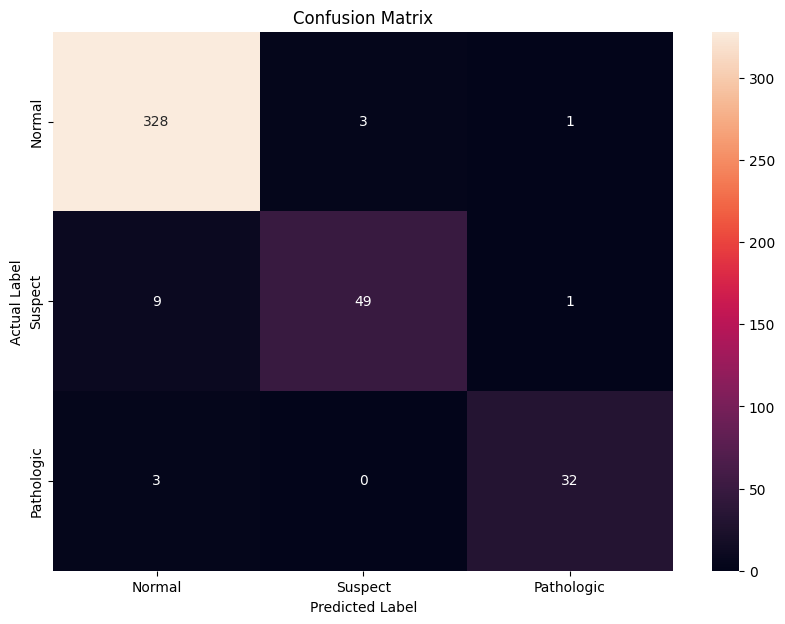

In [8]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_test_lgbm)

# Convert the confusion matrix to a DataFrame
cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_df, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()
print("\n")

## Learning Curve
---



---


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000589 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 523
[LightGBM] [Info] Number of data points in the train set: 1054, number of used features: 10
[LightGBM] [Info] Start training from score -0.234114
[LightGBM] [Info] Start training from score -2.004521
[LightGBM] [Info] Start training from score -2.603639
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[Light

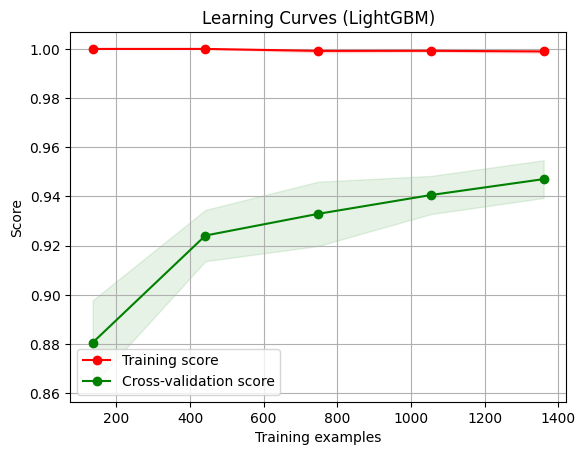

In [9]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plot the learning curve
title = "Learning Curves (LightGBM)"
cv = 5  # Number of folds for cross-validation
plot_learning_curve(lgbm, title, X_train, y_train, cv=cv, n_jobs=-1)
plt.show()


## Save the trained model to a file
___
___

In [11]:
import pickle

with open('/Users/pranavkhot/Documents/Fetal Health Project/trained_models/best_lgb_model.pkl', 'wb') as model_file:
    pickle.dump(lgbm, model_file)

print("Model trained and saved to file.")

Model trained and saved to file.
